Shape of the dataset: (3268, 8)
                                    Product Name  Listing Price    Sale Price  \
count                                       3151    3151.000000   3151.000000   
unique                                      1531            NaN           NaN   
top     Women's adidas Originals Sambarose Shoes            NaN           NaN   
freq                                          16            NaN           NaN   
mean                                         NaN    7045.960330   5983.166931   
std                                          NaN    4652.089511   4173.708897   
min                                          NaN       0.000000    449.000000   
25%                                          NaN    4599.000000   2999.000000   
50%                                          NaN    5999.000000   4599.000000   
75%                                          NaN    8999.000000   7799.000000   
max                                          NaN   29999.000000  36500.000000

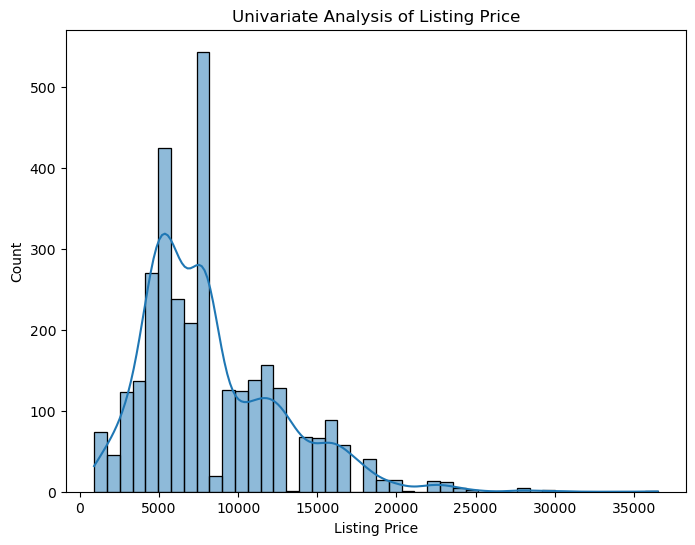

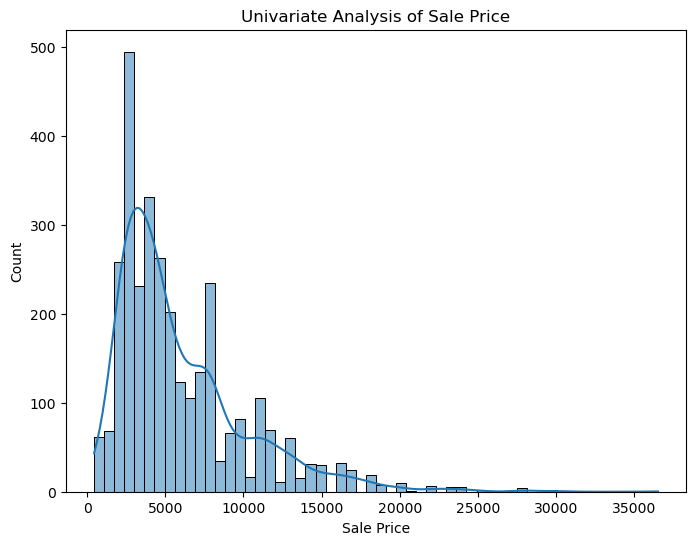

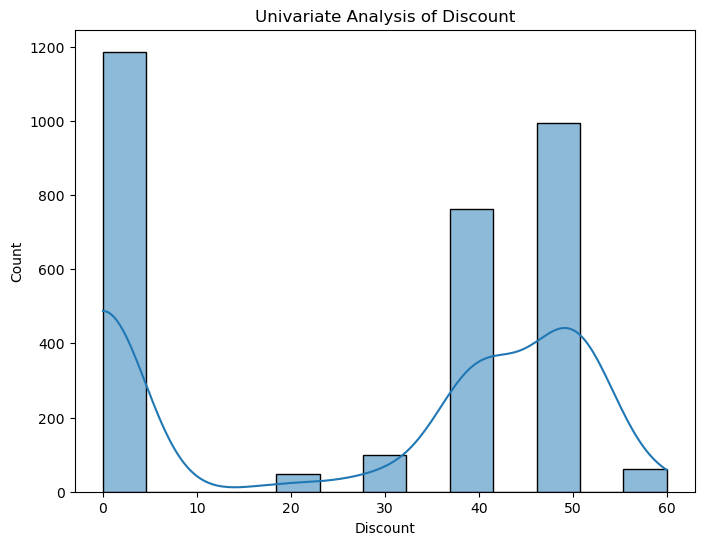

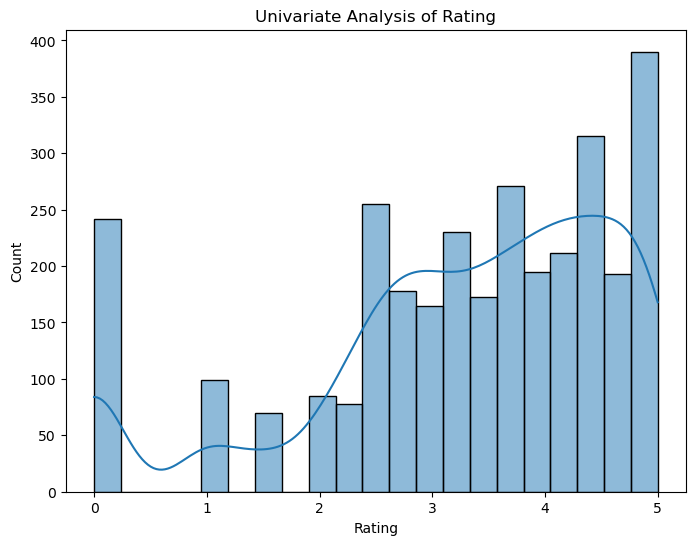

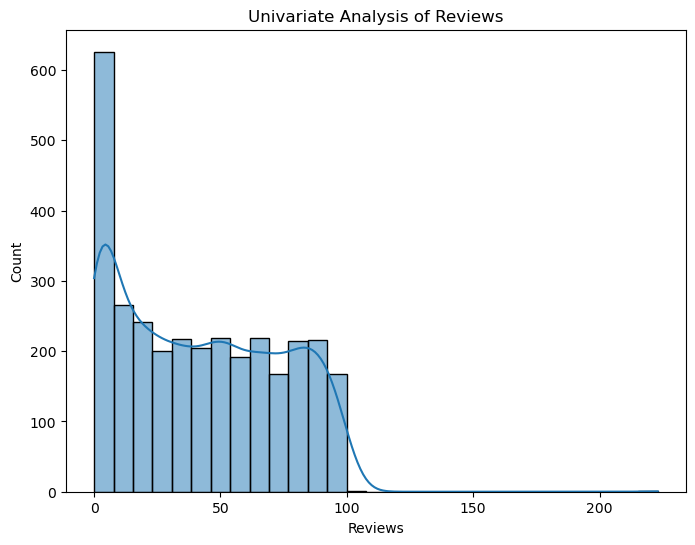

'Cluster' column not found in the DataFrame. Please check the K-means clustering step.


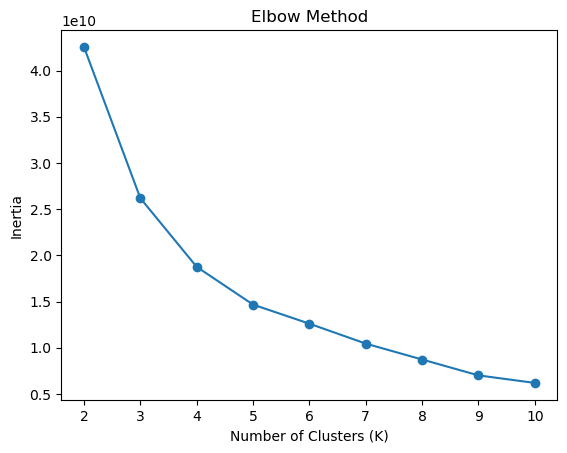

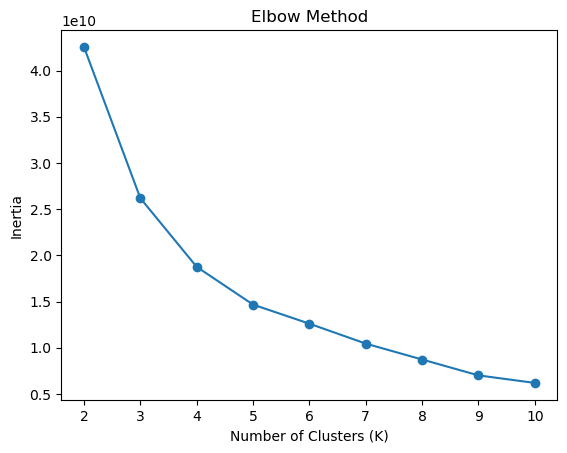

Silhouette Scores: [0.6015918660202887, 0.5227331438718106, 0.45872003212442586, 0.4591488491075074, 0.45595065586210726, 0.422514116074431, 0.45145093904204964, 0.4769980487863786, 0.48650987822570974]
Cluster Profiling:
          Listing Price    Sale Price   Discount    Rating    Reviews  \
Cluster                                                                
0         13878.139509  11077.795759  15.993304  0.008646  33.170759   
1          6000.546785   3958.870953  32.576497 -0.003436  45.356098   

         Cluster_2  Cluster_3  Cluster_4  Cluster_5  Cluster_6  Cluster_7  \
Cluster                                                                     
0              0.0   0.801339   0.555804   3.218750   3.467634   3.132812   
1              1.0   0.843016   1.916186   1.658093   0.983592   2.772506   

         Cluster_8  Cluster_9  Cluster_10  
Cluster                                    
0         3.618304   2.877232    4.306920  
1         3.891353   3.373836    3.651885  
Fin

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Task 1: Data Understanding
# a. Read the dataset and print its shape
data = pd.read_csv("data_add_nik.csv")
print("Shape of the dataset:", data.shape)

# b. Check for redundant columns and drop them
redundant_columns = ['Product ID']  # Assuming 'Product ID' is redundant
data = data.drop(columns=redundant_columns, axis=1)

# c. Check for duplicate records and drop them
data = data.drop_duplicates()

# d. Display 5 points summary
summary = data.describe(include='all')
print(summary)

# Task 2: Exploratory Data Analysis
# a. Check products with Listing_price '0' and display 5 points summary
zero_price_products = data[data['Listing Price'] == 0]
zero_price_summary = zero_price_products.describe(include='all')
print(zero_price_summary)

# b. Replace '0' Listing_price with Sale_Price
data.loc[data['Listing Price'] == 0, 'Listing Price'] = data.loc[data['Listing Price'] == 0, 'Sale Price']

# c. Check and impute missing values
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("Percentage of Missing Values:\n", missing_percentage)
# Impute missing values based on suitable approach (mean, median, mode, etc.)

# d. Univariate analysis
# Add more analysis based on the nature of the variables
for column in data.columns:
    if data[column].dtype != 'O':  # Numeric variables
        plt.figure(figsize=(8, 6))
        sns.histplot(data[column], kde=True)
        plt.title(f'Univariate Analysis of {column}')
        plt.show()

# e. Bivariate and multivariate analysis
# Add more analysis based on the nature of the variables
numeric_columns = data.select_dtypes(include=['float64']).columns

# Bivariate Analysis (Numeric vs. Numeric)
for i in range(len(numeric_columns) - 1):
    for j in range(i + 1, len(numeric_columns)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data[numeric_columns[i]], y=data[numeric_columns[j]], hue=data['Cluster'], palette='viridis')
        plt.title(f'Bivariate Analysis: {numeric_columns[i]} vs. {numeric_columns[j]}')
        plt.show()

# Multivariate Analysis (Numeric vs. Numeric vs. Cluster)
# Check if 'Cluster' column exists
if 'Cluster' in data.columns:
    sns.pairplot(data=data, vars=numeric_columns, hue='Cluster', palette='viridis')
    plt.suptitle('Multivariate Analysis of Numeric Variables with Clusters', y=1.02)
    plt.show()
else:
    print("'Cluster' column not found in the DataFrame. Please check the K-means clustering step.")

# Task 3: Data Preprocessing
# a. Scale all numeric variables
numeric_vars = data.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
data[numeric_vars] = scaler.fit_transform(data[numeric_vars])

# Task 4: K-Means Clustering
# a. Apply K-Means clustering for 2 to 10 clusters
features = data.drop(columns=['Product Name', 'Brand'])
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Explicitly set n_init
    data[f'Cluster_{k}'] = kmeans.fit_predict(features)

# b. Plot elbow curve
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Explicitly set n_init
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# c. Determine optimal clusters based on the elbow method
# Choose optimal K based on analysis

# Plot elbow curve
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


# d. Calculate silhouette scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Explicitly set n_init
    labels = kmeans.fit_predict(features)
    silhouette_scores.append(silhouette_score(features, labels))

print("Silhouette Scores:", silhouette_scores)

# e. Choose the optimal K with the highest silhouette score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans_optimal = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)  # Explicitly set n_init
data['Cluster'] = kmeans_optimal.fit_predict(features)

# f. Cluster profiling
cluster_profile = data.groupby('Cluster').mean(numeric_only=True)  # Option 1
# OR
# cluster_profile = data.groupby('Cluster').agg('mean')  # Option 2
print("Cluster Profiling:\n", cluster_profile)

# g. Add K-means cluster labels to the original data
# Already added cluster labels during K-Means clustering

# h. Do cluster profiling and display
# Already done above

# i. Share insights on the clusters
# Analyze the characteristics of each cluster based on cluster profiling

# j. Business recommendations based on cluster profiles
# Provide actionable recommendations based on insights gained from cluster analysis

# Display the final dataset with cluster labels
print("Final Dataset with Cluster Labels:\n", data.head())


Shape of the dataset: (229, 14)
       Surface area  Population in thousands  Population density  \
count  2.260000e+02             2.290000e+02          229.000000   
mean   5.932100e+05             3.275679e+04          462.824891   
std    1.796021e+06             1.332751e+05         2305.384253   
min    1.000000e-05             1.000000e+00            0.100000   
25%    4.306500e+03             4.310000e+02           35.900000   
50%    8.373550e+04             5.448000e+03           88.100000   
75%    4.376935e+05             1.919300e+04          222.800000   
max    1.709825e+07             1.409517e+06        25969.800000   

       GDP: Gross domestic product  Economy: Agriculture  Economy: Industry  \
count                 2.080000e+02            206.000000         208.000000   
mean                  3.538963e+05             11.481553          27.565385   
std                   1.548160e+06             12.100601          13.124423   
min                   3.300000e+01     

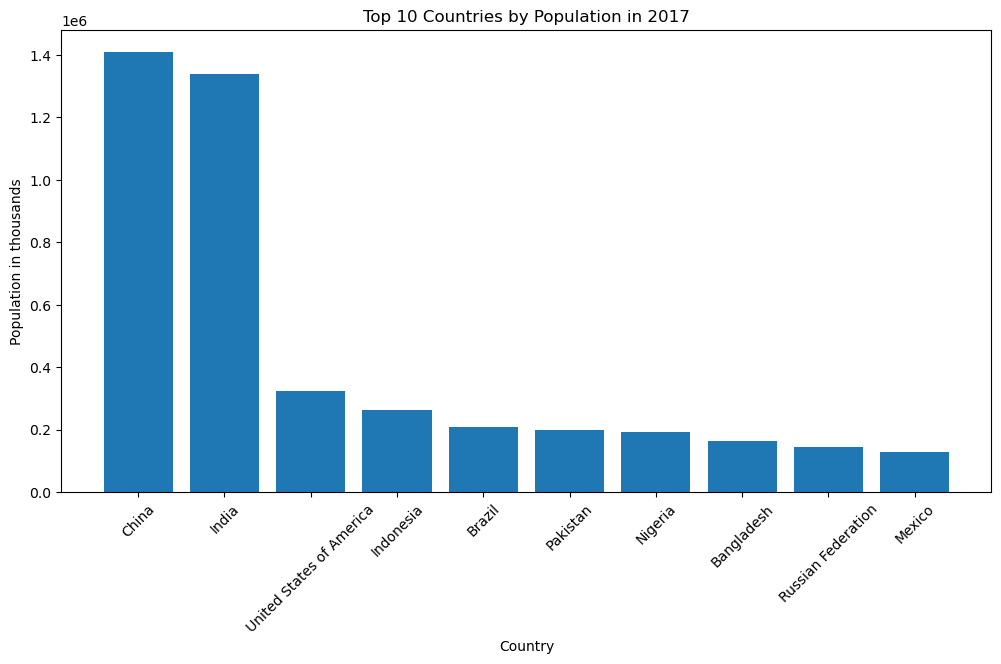

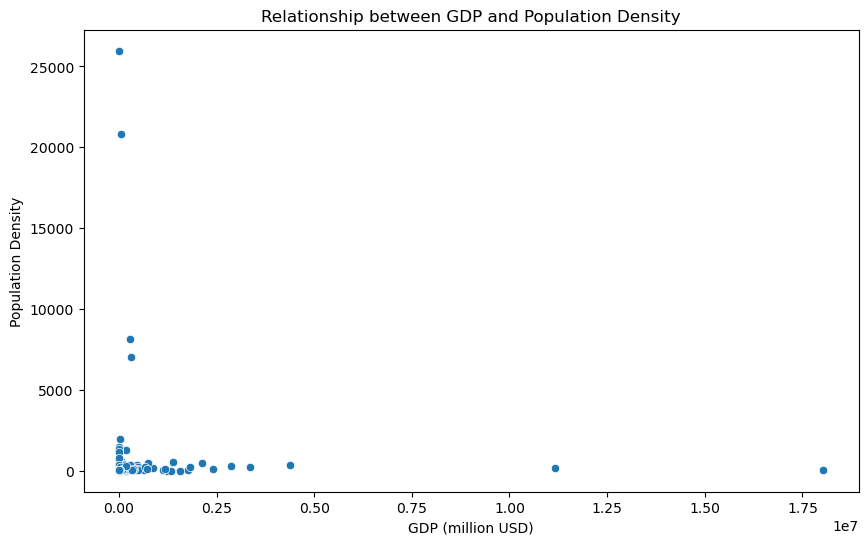

C:\Users\moham\AppData\Local\Temp\ipykernel_20676\1679250479.py:37: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


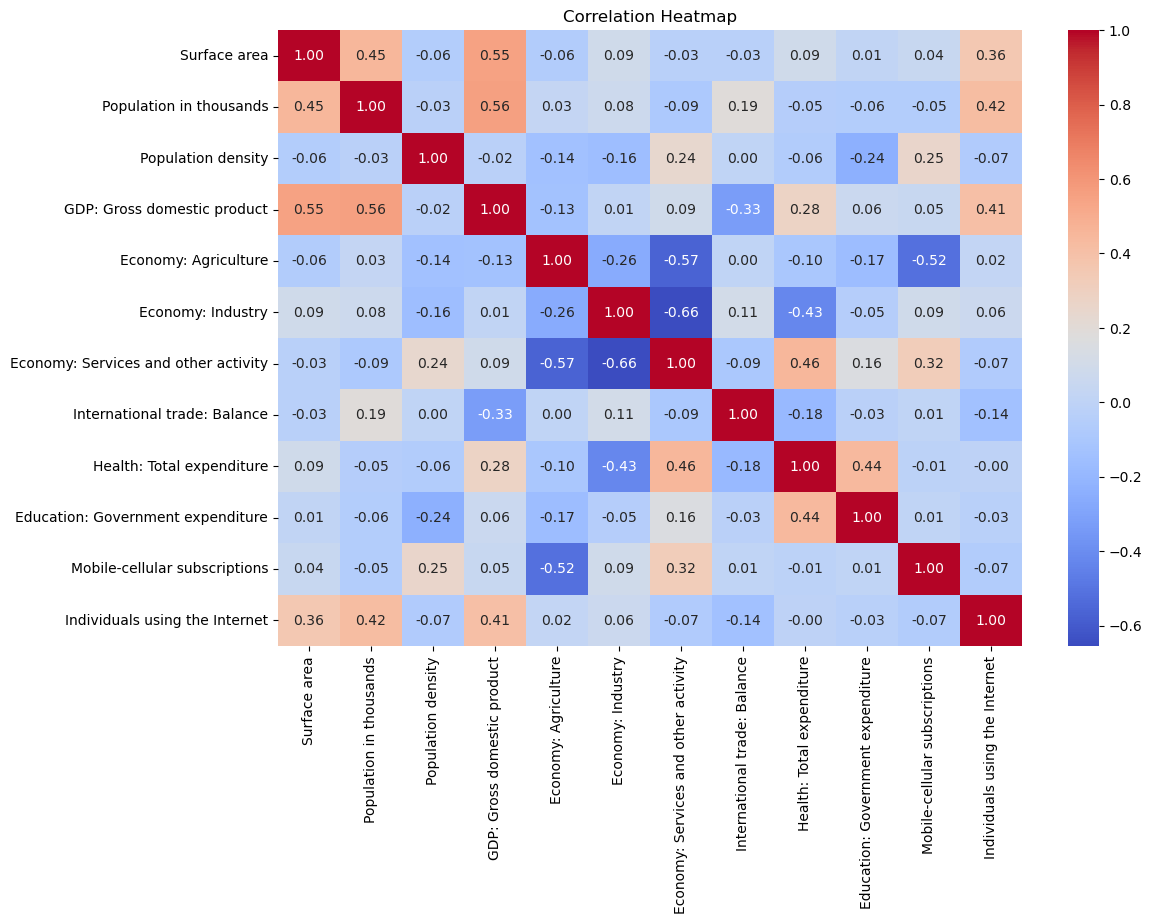

Missing values in the dataset:
country                                  0
Region                                   0
Surface area                             3
Population in thousands                  0
Population density                       0
GDP: Gross domestic product             21
Economy: Agriculture                    23
Economy: Industry                       21
Economy: Services and other activity    21
International trade: Balance            19
Health: Total expenditure               39
Education: Government expenditure       81
Mobile-cellular subscriptions           20
Individuals using the Internet           1
dtype: int64


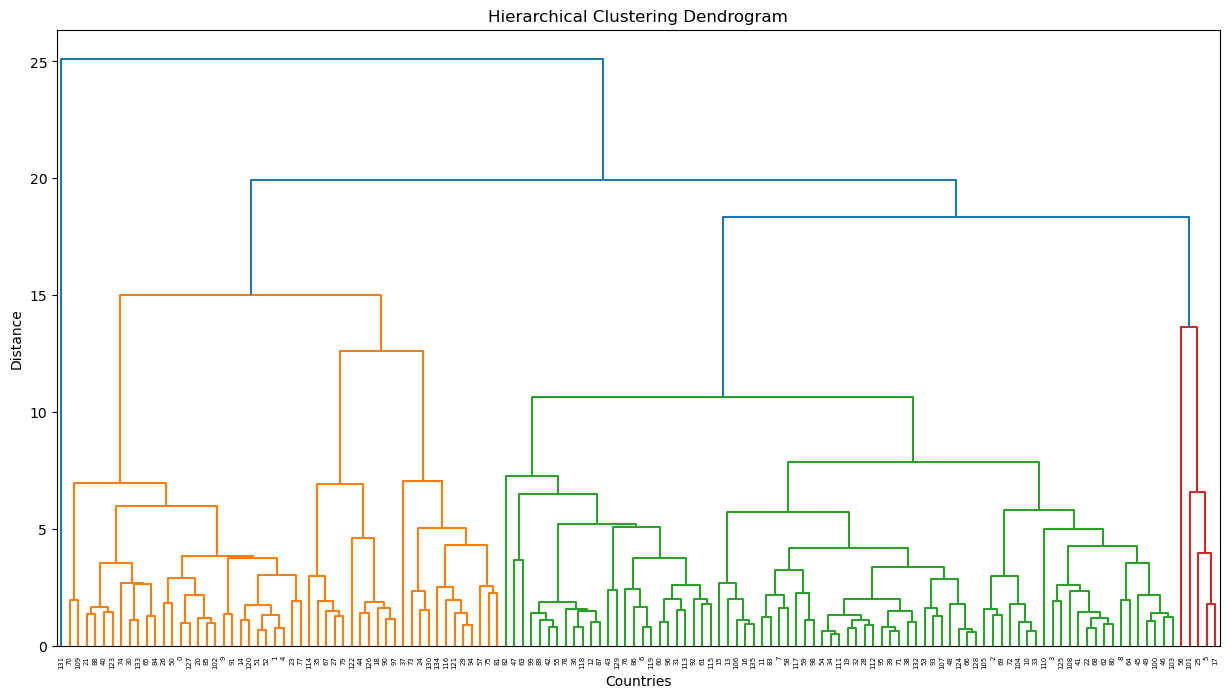

C:\Users\moham\AppData\Local\Temp\ipykernel_20676\1679250479.py:73: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = df.groupby('HC_Clusters').mean()


             Surface area  Population in thousands  Population density  \
HC_Clusters                                                              
1               -0.049082                 0.017557           -0.144041   
2                0.121031                 0.022785           -0.075754   
3                5.156296                 2.193525           -0.185766   

             GDP: Gross domestic product  Economy: Agriculture  \
HC_Clusters                                                      
1                              -0.168031              0.958920   
2                               0.041006             -0.435660   
3                              11.449345             -0.868311   

             Economy: Industry  Economy: Services and other activity  \
HC_Clusters                                                            
1                     0.191491                             -0.918633   
2                    -0.095283                              0.411605   
3         

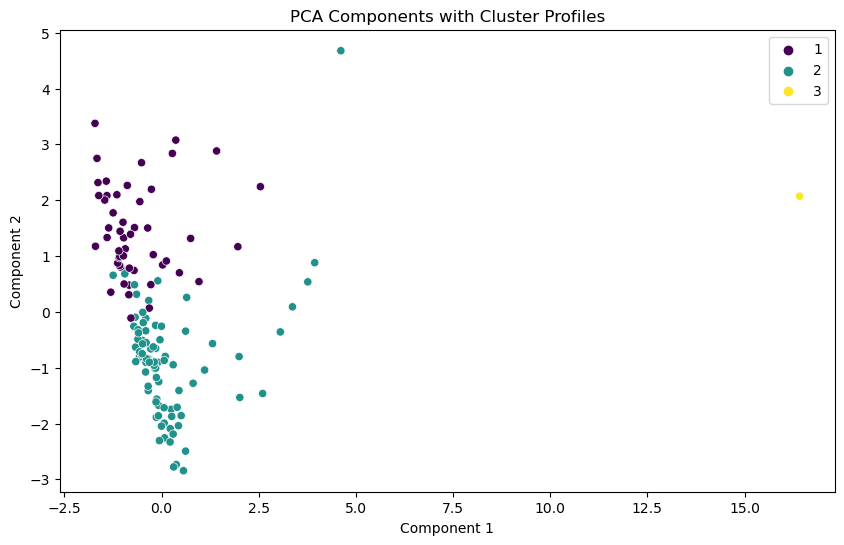

C:\Users\moham\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\moham\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means Cluster Centers:
   Surface area  Population in thousands  Population density  \
0      0.106020                -0.096219           -0.073338   
1      5.156296                 2.193525           -0.185766   
2     -0.014876                 0.191033           -0.142588   

   GDP: Gross domestic product  Economy: Agriculture  Economy: Industry  \
0                     0.036247             -0.487549          -0.127007   
1                    11.449345             -0.868311          -0.600740   
2                    -0.145906              0.932972           0.216779   

   Economy: Services and other activity  International trade: Balance  \
0                              0.479023                      0.074830   
1                              1.177339                    -10.899462   
2                             -0.919952                     -0.024621   

   Health: Total expenditure  Education: Government expenditure  \
0                   0.411408                           0.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA  # Add PCA import
from sklearn.cluster import KMeans  # Add KMeans import
import numpy as np  # Add NumPy import

# Step 1: Data Understanding
# a. Read the Data set "country_stats.csv" and print the shape of the dataset.
df = pd.read_csv("country_stats.csv")
print("Shape of the dataset:", df.shape)

# b. Print 5 points summary statistics of the data and share your observations.
print(df.describe())

# Step 2: Exploratory Data Analysis
# a. Perform Univariate Analysis on the data and find out which country has more population as per 2017.
plt.figure(figsize=(12, 6))
df_sorted_by_population = df.sort_values(by='Population in thousands', ascending=False)
plt.bar(df_sorted_by_population['country'][:10], df_sorted_by_population['Population in thousands'][:10])
plt.xlabel('Country')
plt.ylabel('Population in thousands')
plt.title('Top 10 Countries by Population in 2017')
plt.xticks(rotation=45)
plt.show()

# b. Perform bivariate and multivariate analysis and share your insights. Any 2 plots which explain the relationship better.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP: Gross domestic product', y='Population density', data=df)
plt.xlabel('GDP (million USD)')
plt.ylabel('Population Density')
plt.title('Relationship between GDP and Population Density')
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Step 3: Data Pre-processing
# a. Check if the data has any missing values, if any, impute those with a suitable approach.
print("Missing values in the dataset:")
print(df.isnull().sum())

# b. Scale all the numeric variables in the data.
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Handle infinite values
df.dropna(inplace=True)  # Drop NaN values

# Step 4: Hierarchical Clustering
# a. Apply Hierarchical clustering to the scaled data.
linkage_matrix = linkage(df[numeric_columns], method='ward', metric='euclidean')

# b. Identify the number of optimum clusters using Dendrogram and briefly describe them.
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.show()

optimal_clusters = 3  # Adjust based on observation

# c. Do Cluster profiling and display.
clusters = fcluster(linkage_matrix, optimal_clusters, criterion='maxclust')
df['HC_Clusters'] = clusters

cluster_profiles = df.groupby('HC_Clusters').mean()
print(cluster_profiles)

# d. Share your insights on cluster profiles and also give any 2 business recommendations.

# Step 5: Dimensionality Reduction using PCA
# a. Apply PCA on the scaled data with 2 components.
pca = PCA(n_components=2)
reduced_df_pca = pca.fit_transform(df[numeric_columns])
reduced_df_pca = pd.DataFrame(reduced_df_pca, columns=['Component 1', 'Component 2'])

# b. How much Cumulative Variance is Explained by 2 PCA’s?
cumulative_variance = sum(pca.explained_variance_ratio_)
print("Cumulative Variance Explained by 2 PCA components:", cumulative_variance)

# c. Plot a scatter plot on PCA’s formed i.e. PCA 1 and PCA 2 with hue as cluster profiles.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=reduced_df_pca, x='Component 1', y='Component 2', hue=clusters, palette='viridis')
plt.title('PCA Components with Cluster Profiles')
plt.show()

# Step 6: K-Means Clustering
# a. Apply K-Means clustering on the scaled data with K=3.
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Clusters'] = kmeans.fit_predict(df[numeric_columns])

# b. Display Cluster Centers.
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=numeric_columns)
print("K-Means Cluster Centers:")
print(cluster_centers)

# c. Compare K-Means clusters with Hierarchical clusters and share your insights.
comparison_df = pd.DataFrame({'Hierarchical Clusters': clusters, 'K-Means Clusters': df['KMeans_Clusters']})
print("Cluster Comparison:")
print(comparison_df)

# d. Provide business recommendations based on K-Means clusters.

# Your business recommendations can be added here based on the analysis.

# End of the combined code
